# SINGLE VALUE DECOMPOSITION IN IMAGE PROCESSING

The singular value decomposition of an $\displaystyle m\times n$ complex matrix M is a factorization of the form $\displaystyle \mathbf {U\Sigma V^{*}} $ , where U is an $\displaystyle m\times m$ complex unitary matrix, $\displaystyle \mathbf {\Sigma } $ is an $\displaystyle m\times n$ rectangular diagonal matrix with non-negative real numbers on the diagonal, and V is an $\displaystyle n\times n$ complex unitary matrix. If M is real, U and V can also be guaranteed to be real orthogonal matrices. In such contexts, the SVD is often denoted $\displaystyle \mathbf {U\Sigma V^{T}} $.


The matrices $\displaystyle {U,\space \Sigma \space and \space V^{T} \space} $have the following properties:
* U  and V are orthogonal matrices $ (U^{T}=U^{−1} and \space V^{T}=V^{−1}) $
* $\Sigma$ is a diagonal matrix, however it is not necessarily a square matrix.

The columns of U are called the left-singular vectors of A while the columns of V are the right-singular vectors of A. The values along the diagonal of $\Sigma$ are the singular values of A.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as pil_image
import seaborn as sns
%matplotlib inline
import time

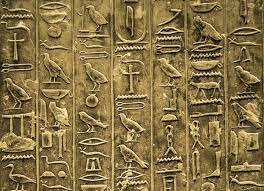

In [4]:
from IPython.display import Image
Image(filename='Hyrogliphic_Image.png') 

In [5]:
image_file = "Hyrogliphic_Image.png"
img = pil_image.open(image_file)

In [6]:
img.size

(264, 191)

In [7]:
red_band =img.getdata(band=0)

In [8]:
# Converting the image to numpy array 
img_arr = np.array(list(red_band), float)
img_arr.size

50424

In [9]:
# Converting Array to matrix, and using the original size of the image to split the array in rows & columns
img_arr.shape = (img.size[1], img.size[0])
img_mat = np.matrix(img_arr)
img_mat

matrix([[112.,  80.,  67., ...,  52.,  96., 109.],
        [ 80.,  84.,  52., ...,  66.,  77., 103.],
        [ 90.,  70.,  43., ...,  72.,  81., 126.],
        ...,
        [ 98., 121., 144., ..., 118., 127., 113.],
        [ 76., 113., 149., ..., 125., 124., 102.],
        [ 85., 125., 162., ...,  99., 105.,  95.]])

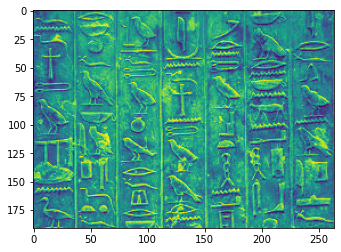

In [10]:
plt.imshow(img_mat)

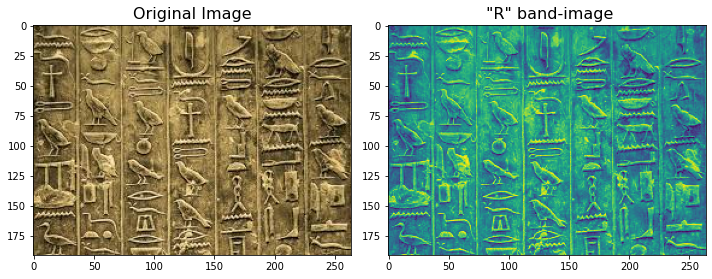

In [11]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
axs[0].imshow(img)
axs[0].set_title('Original Image', size=16)
axs[1].imshow(img_mat)
axs[1].set_title(' "R" band-image', size=16)
plt.tight_layout()

In [12]:
# scale the image matrix befor SVD so that every variable is in the same scale
img_mat_scaled= (img_mat-img_mat.mean())/img_mat.std()

In [13]:
# Getting the SVD using np.linalg.svd
U,s,V = np.linalg.svd(img_mat_scaled)

In [14]:
U.shape

(191, 191)

In [15]:
# Variance
s.shape

(191,)

In [34]:
np.diag(s).shape

(191, 191)

In [16]:
V.shape

(264, 264)

If the columns of a matrix Q = [q1 ... qn] are orthonormal, then $Q^{T}Q$ = I is the
identity. A square orthonormal matrix Q is called an orthogonal matrix. If Q is square,
then $Q^{T}Q$ = I tells us that $Q^{T} = Q^{−1}$.

In [17]:
# Finding Transpose and inverse of U
U_inverse = np.linalg.inv(U)
U_transpose = U.T

if U_inverse.all() == U_transpose.all():
    print("U is a ORTHOGONAL Matrix")

U is a ORTHOGONAL Matrix


In [18]:
# Finding Transpose and inverse of U
V_inverse = np.linalg.inv(V)
V_transpose = V.T

if V_inverse.all() == V_transpose.all():
    print("V is a ORTHOGONAL Matrix")

V is a ORTHOGONAL Matrix


The first singular vector or principal component explains most of variation in the image. In this example it explains 13.3% of the total variation and the second one explains close to 6.5% of the variation.

## Showing the Energy of reconstructed images from individual ranks of U, s and V

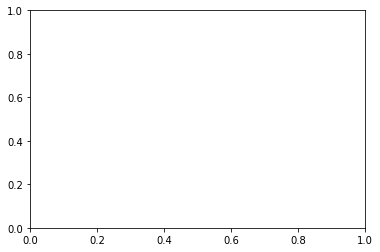

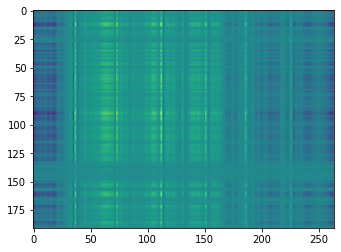

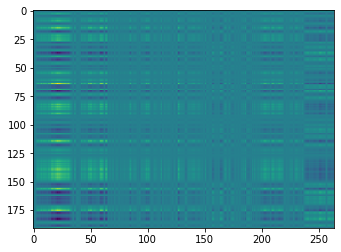

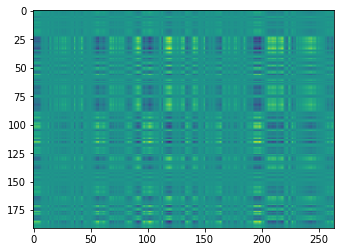

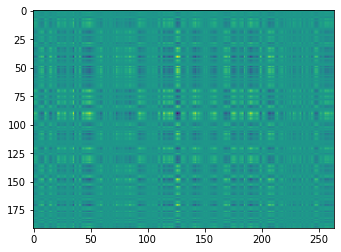

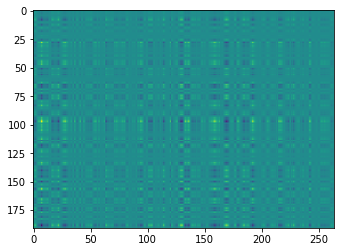

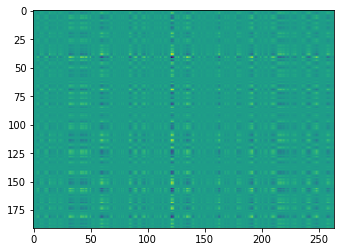

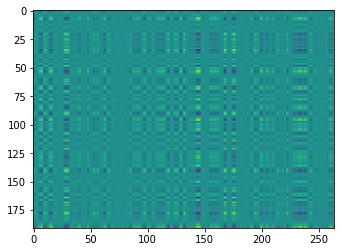

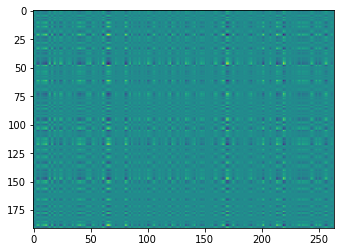

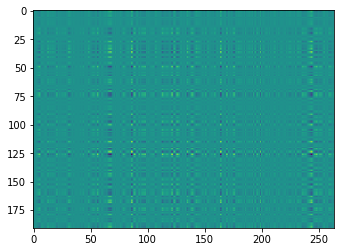

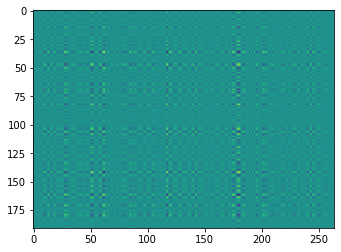

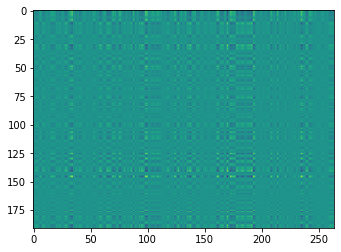

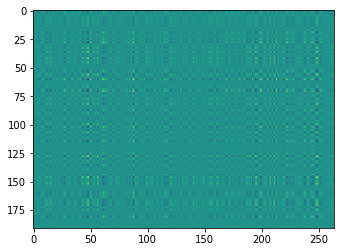

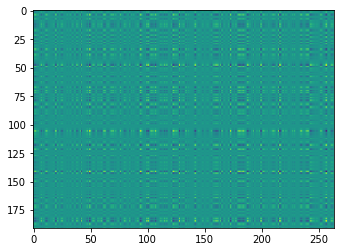

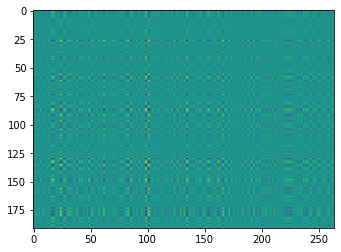

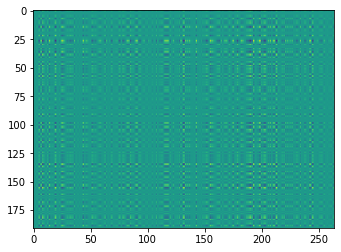

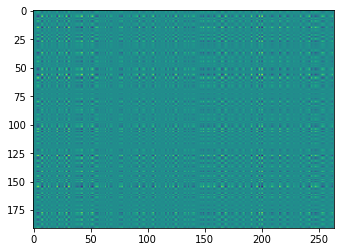

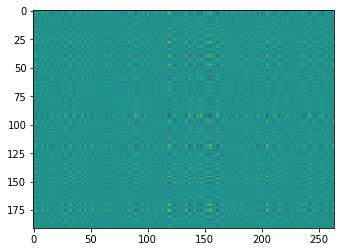

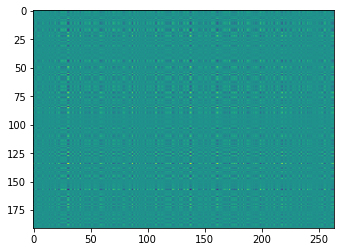

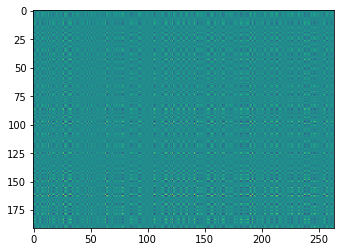

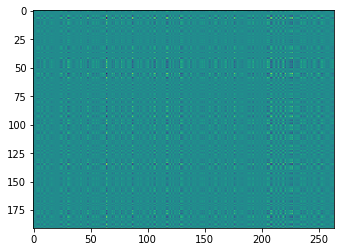

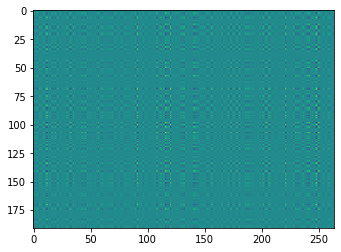

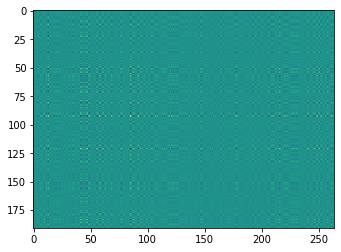

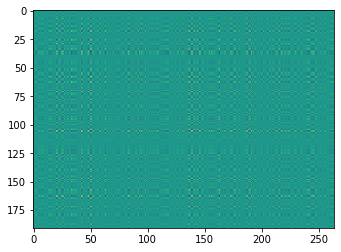

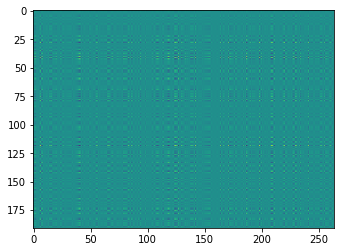

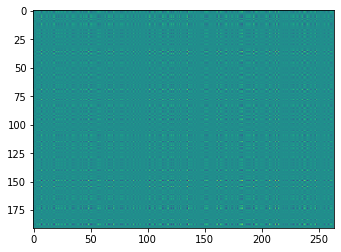

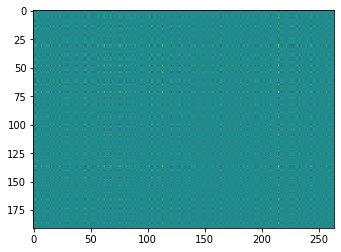

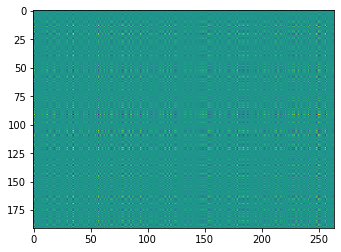

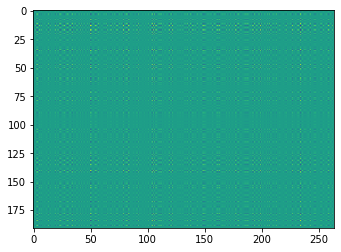

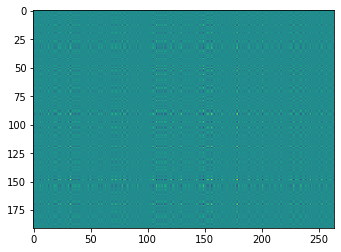

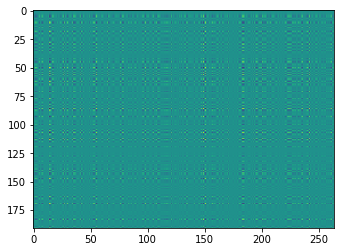

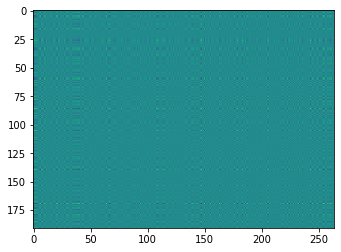

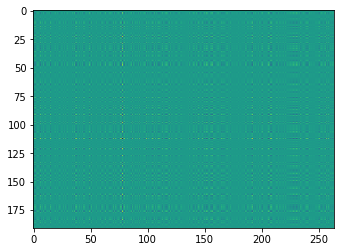

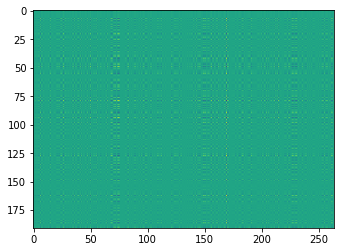

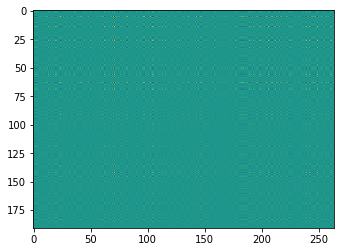

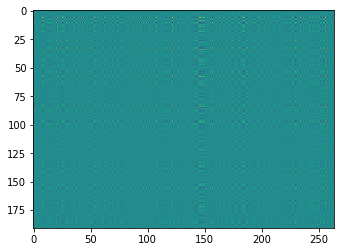

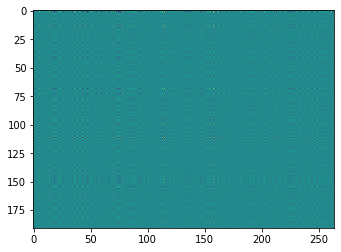

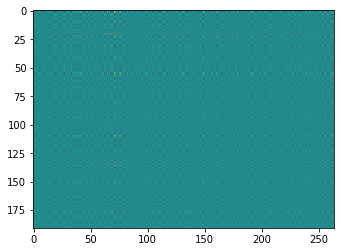

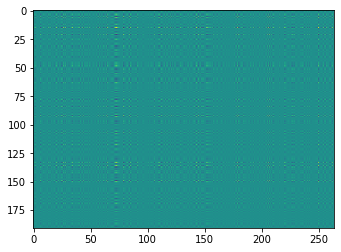

In [22]:
import time
fig, ax = plt.subplots()
plt.ion()
plt.show()

for i in range(1,len(U),5):
    reconst_image = np.matrix(U[:,(i-1):i]) * np.diag(s[(i-1):i]) * np.matrix(V[(i-1):i,:])
    image_test = plt.imshow(reconst_image)
#     plt.gcf().canvas.draw()
    plt.pause(.08)

# plt.gcf().canvas.flush_events()
plt.close()

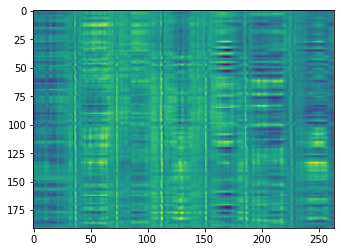

In [23]:
import matplotlib.pyplot as plt
# Reconstructing image by taking multiple top rank singular vectors together
no_of_ranks = 5
reconstructed_image_using_top_5_ranks = np.matrix(U[:,:no_of_ranks]) * np.diag(s[:no_of_ranks]) * np.matrix(V[:no_of_ranks,:])
im_5 = plt.imshow(reconstructed_image_using_top_5_ranks)
plt.show(im_5)

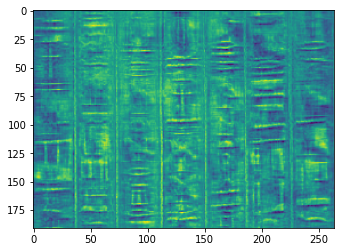

In [30]:
# Reconstructing image by taking multiple top rank singular vectors together
no_of_ranks = 20
reconstructed_image_using_top_20_ranks = np.matrix(U[:,:no_of_ranks]) * np.diag(s[:no_of_ranks]) * np.matrix(V[:no_of_ranks,:])
im_20 = plt.imshow(reconstructed_image_using_top_20_ranks)
plt.show(im_20)

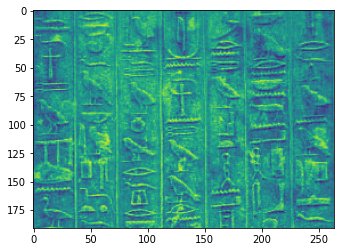

In [25]:
# Reconstructing image by taking multiple top rank singular vectors together
no_of_ranks = 50
reconstructed_image_using_top_50_ranks = np.matrix(U[:,:no_of_ranks]) * np.diag(s[:no_of_ranks]) * np.matrix(V[:no_of_ranks,:])
im_50 = plt.imshow(reconstructed_image_using_top_50_ranks)
plt.show(im_50)

### The above rendition is an IMAGE COMPRESSION as we are using only the first 50 rows of U and 50 columns of V to generate the image.

In [19]:
np.sum(s**2)

50423.999999999985

In [20]:
# Percentage of variance projected by every singular vector
s_variance = np.round(s**2/np.sum(s**2), decimals=3)
s_variance

array([0.133, 0.065, 0.052, 0.044, 0.039, 0.036, 0.035, 0.03 , 0.025,
       0.025, 0.02 , 0.018, 0.017, 0.016, 0.016, 0.015, 0.014, 0.013,
       0.012, 0.012, 0.011, 0.01 , 0.01 , 0.01 , 0.01 , 0.009, 0.009,
       0.008, 0.008, 0.008, 0.008, 0.007, 0.007, 0.007, 0.007, 0.006,
       0.006, 0.006, 0.006, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005,
       0.005, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004,
       0.004, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001,

<AxesSubplot:>

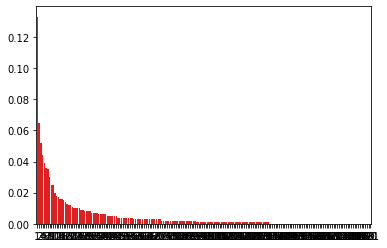

In [38]:
# Bar plot of the Variance - The variance is already arranged in DECREASING ORDER
sns.barplot(x=list(range(1,192)), y = s_variance[0:191], color='red')

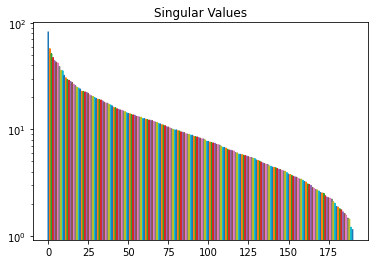

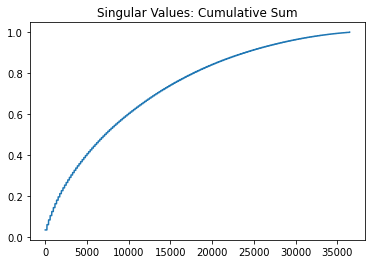

In [32]:
# Energy Plots of the Singular Values:
plt.figure(1)
plt.semilogy(np.diag(s))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(s)/np.sum(np.diag(s))))
plt.title("Singular Values: Cumulative Sum")
plt.show()

## CONCLUSION

We as a team are very inspired by Feature Reduction, Dimensionality Reduction Techniques by SVD, PCA,  Gram Schimdt etc. We found this paper giving an opportunity to understand Author’s view point in the early days of SVD concept.

We deliberately chose a paper which was published almost a decade back so that it gives an opportunity to continue to evaluate further papers published on this and understand the complete evolution. Also it was eaiser on the learning curve ;-) 
Same Author has published 2 more papers on applications using SVD in the subsequent years
